#Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
dataset = pd.read_csv('climate_nasa.csv')

# Data Preprocessing

In [ ]:
dataset.head(10)

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
5,2022-09-15T17:10:57.000Z,4,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,1.0,Excellent example...very relatable to the Gen ...
6,2022-09-07T17:31:25.000Z,10,a9117191b443a0494349d21508a3de7df675250b786612...,NaN,I am so proud of whoever created this content....
7,2022-09-07T18:07:53.000Z,1,39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...,21.0,Has the Earth ever had a concentration of over...
8,2022-09-07T22:45:56.000Z,0,1492464caa9b6757f6e740a6cc8f75a44614645e9f6c64...,NaN,"Yes, and not even half a cup later that poor s..."
9,2022-09-07T16:30:55.000Z,4,31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...,8.0,Historical co2 data would make it an interesti...


Dropping the profileName columns as it contains valuable info and do not  play any role in sentiment analysis

In [ ]:
dataset = dataset.drop('profileName',axis=1)

In [ ]:
dataset.head(10)

,date,likesCount,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,26.0,"Yes, and carbon dioxide does not harm the Eart..."
5,2022-09-15T17:10:57.000Z,4,1.0,Excellent example...very relatable to the Gen ...
6,2022-09-07T17:31:25.000Z,10,NaN,I am so proud of whoever created this content....
7,2022-09-07T18:07:53.000Z,1,21.0,Has the Earth ever had a concentration of over...
8,2022-09-07T22:45:56.000Z,0,NaN,"Yes, and not even half a cup later that poor s..."
9,2022-09-07T16:30:55.000Z,4,8.0,Historical co2 data would make it an interesti...


# Cleaning the Dataset

In [ ]:
dataset = dataset.fillna(0)

In [ ]:
dataset.head(10)

,date,likesCount,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,0.0,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,0.0,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,0.0,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,26.0,"Yes, and carbon dioxide does not harm the Eart..."
5,2022-09-15T17:10:57.000Z,4,1.0,Excellent example...very relatable to the Gen ...
6,2022-09-07T17:31:25.000Z,10,0.0,I am so proud of whoever created this content....
7,2022-09-07T18:07:53.000Z,1,21.0,Has the Earth ever had a concentration of over...
8,2022-09-07T22:45:56.000Z,0,0.0,"Yes, and not even half a cup later that poor s..."
9,2022-09-07T16:30:55.000Z,4,8.0,Historical co2 data would make it an interesti...


# Applying the Vader Sentiment Scoring

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Running the polarity score on the *dataset*

In [ ]:
res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['text']
    myid = row['date']
    res[myid] = sia.polarity_scores(str(text))


  0%|          | 0/522 [00:00<?, ?it/s]

In [ ]:
res

{'2022-09-07T17:12:32.000Z': {'neg': 0.045,
  'neu': 0.718,
  'pos': 0.237,
  'compound': 0.7702},
 '2022-09-08T14:51:13.000Z': {'neg': 0.0,
  'neu': 0.465,
  'pos': 0.535,
  'compound': 0.784},
 '2022-09-07T17:19:41.000Z': {'neg': 0.0,
  'neu': 0.854,
  'pos': 0.146,
  'compound': 0.3736},
 '2022-09-08T00:51:30.000Z': {'neg': 0.155,
  'neu': 0.658,
  'pos': 0.187,
  'compound': 0.1759},
 '2022-09-07T19:06:20.000Z': {'neg': 0.1,
  'neu': 0.642,
  'pos': 0.258,
  'compound': 0.6059},
 '2022-09-15T17:10:57.000Z': {'neg': 0.0,
  'neu': 0.764,
  'pos': 0.236,
  'compound': 0.5719},
 '2022-09-07T17:31:25.000Z': {'neg': 0.0,
  'neu': 0.518,
  'pos': 0.482,
  'compound': 0.8797},
 '2022-09-07T18:07:53.000Z': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 '2022-09-07T22:45:56.000Z': {'neg': 0.165,
  'neu': 0.691,
  'pos': 0.144,
  'compound': -0.1027},
 '2022-09-07T16:30:55.000Z': {'neg': 0.0,
  'neu': 0.748,
  'pos': 0.252,
  'compound': 0.4019},
 '2022-09-07T16:13:39.000Z': {'

In [ ]:
vaders = pd.DataFrame(res).T

In [ ]:
vaders

,neg,neu,pos,compound
2022-09-07T17:12:32.000Z,0.045,0.718,0.237,0.7702
2022-09-08T14:51:13.000Z,0.000,0.465,0.535,0.7840
2022-09-07T17:19:41.000Z,0.000,0.854,0.146,0.3736
2022-09-08T00:51:30.000Z,0.155,0.658,0.187,0.1759
2022-09-07T19:06:20.000Z,0.100,0.642,0.258,0.6059
...,...,...,...,...
2022-12-22T17:21:37.000Z,0.000,0.633,0.367,0.4404
2022-12-22T17:19:51.000Z,0.184,0.816,0.000,-0.4019
2022-12-22T17:12:57.000Z,0.000,0.619,0.381,0.5106
2022-12-22T17:01:12.000Z,0.000,1.000,0.000,0.0000


In [ ]:
vaders = vaders.reset_index().rename(columns={'index': 'date'})
vaders = vaders.merge(dataset, how='left')

In [ ]:
vaders

,date,neg,neu,pos,compound,likesCount,commentsCount,text
0,2022-09-07T17:12:32.000Z,0.045,0.718,0.237,0.7702,2,0.0,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0.000,0.465,0.535,0.7840,0,0.0,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,0.000,0.854,0.146,0.3736,1,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,0.155,0.658,0.187,0.1759,4,0.0,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,0.100,0.642,0.258,0.6059,16,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0.000,0.633,0.367,0.4404,0,0.0,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,0.184,0.816,0.000,-0.4019,1,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,0.000,0.619,0.381,0.5106,3,0.0,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,0.000,1.000,0.000,0.0000,1,0.0,Sergio Yepes


# EDA

*Effect* of  Positive Sentiment on LikesCount

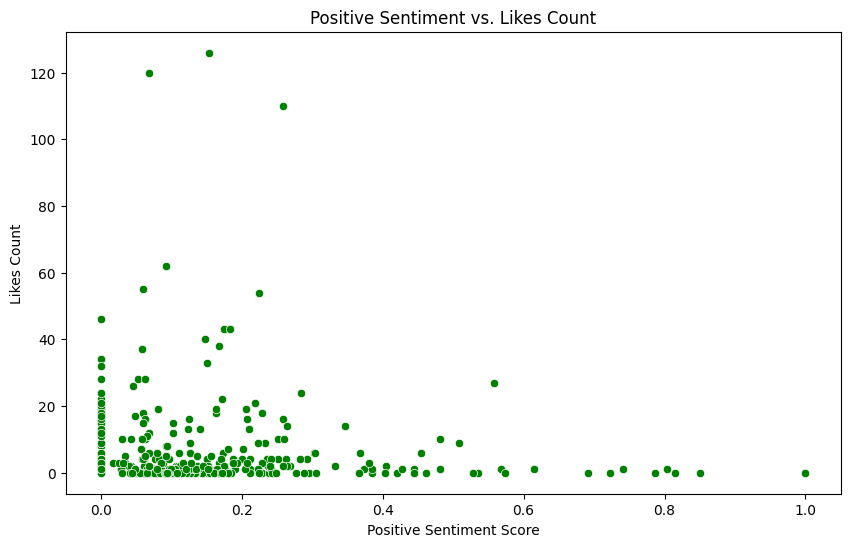

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaders, x='pos', y='likesCount',color='green')
plt.title('Positive Sentiment vs. Likes Count')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Likes Count')
plt.show()

Effect of Positive Sentiment on CommentsCount

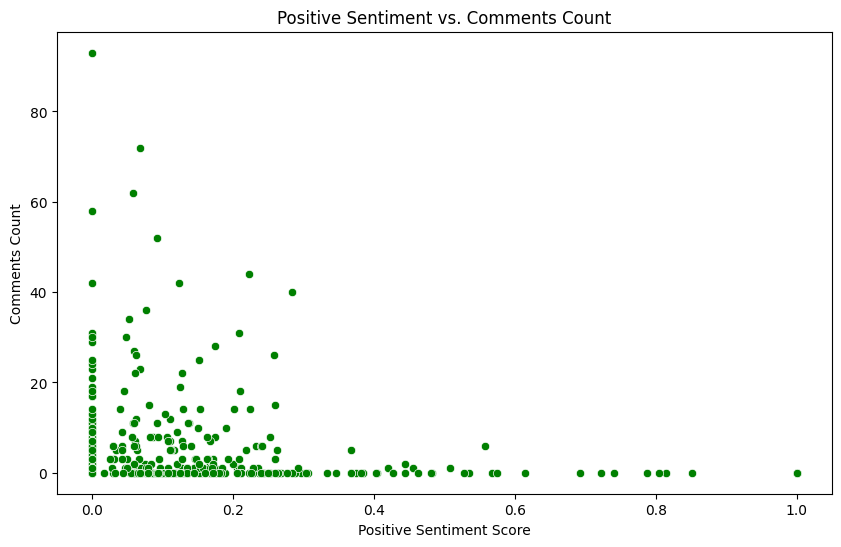

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaders, x='pos', y='commentsCount',color='green')
plt.title('Positive Sentiment vs. Comments Count')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Comments Count')
plt.show()

Correlation Matrix Between Positive Sentiment, LikesCount and CommentsCount

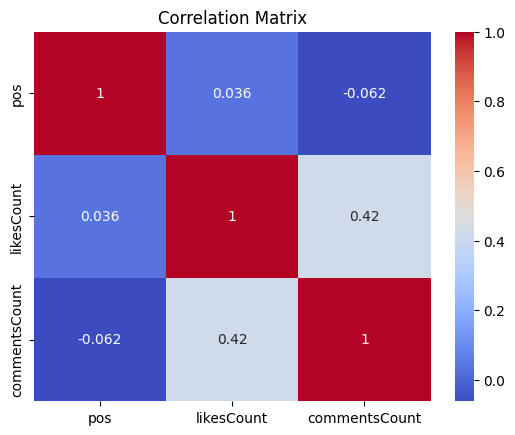

In [ ]:
selected_columns = ['pos', 'likesCount','commentsCount']
corr_matrix = vaders[selected_columns].corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Effect of Negative Sentiment on LikesCount

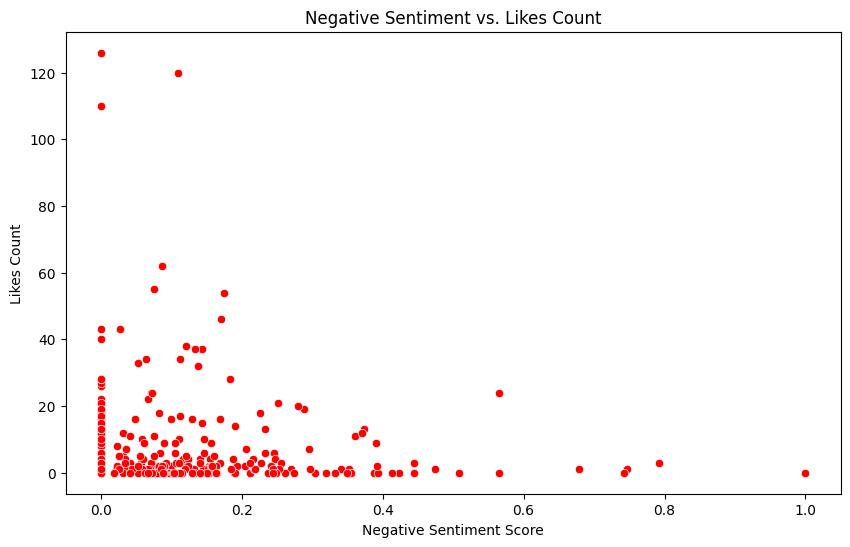

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaders, x='neg', y='likesCount',color='red')
plt.title('Negative Sentiment vs. Likes Count')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Likes Count')
plt.show()

Effect of Negative Sentiment on CommentsCount

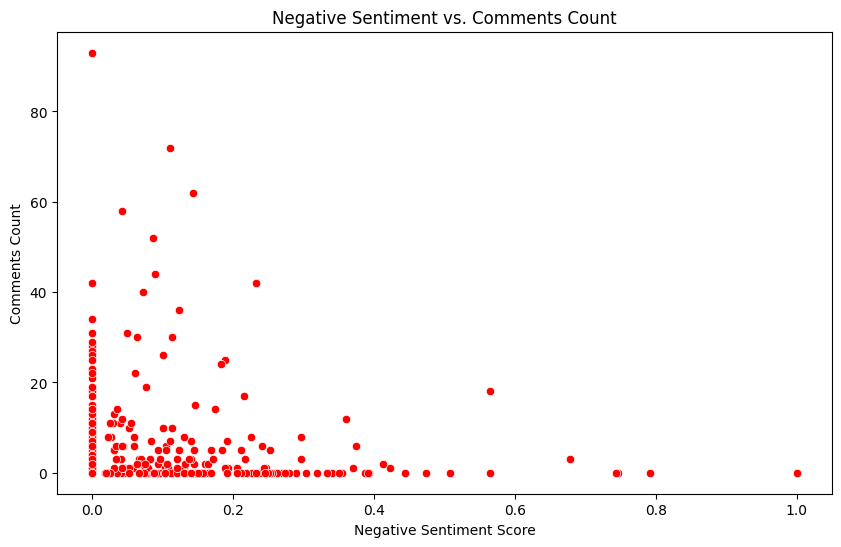

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaders, x='neg', y='commentsCount',color='red')
plt.title('Negative Sentiment vs. Comments Count')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Comments Count')
plt.show()

Correlation Matrix Between Negative Sentiment, LikesCount and CommentsCount

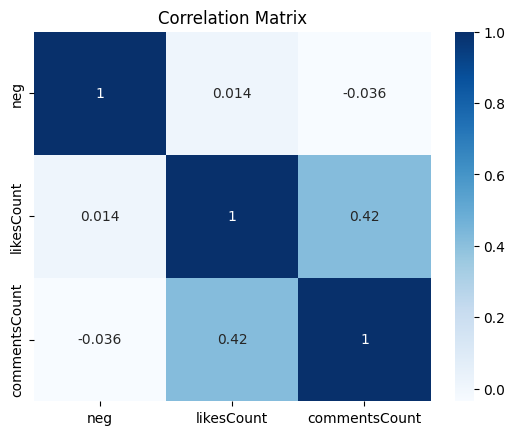

In [ ]:
selected_columns = ['neg', 'likesCount','commentsCount']
corr_matrix = vaders[selected_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

Effect of Neutral Sentiment on LikesCount

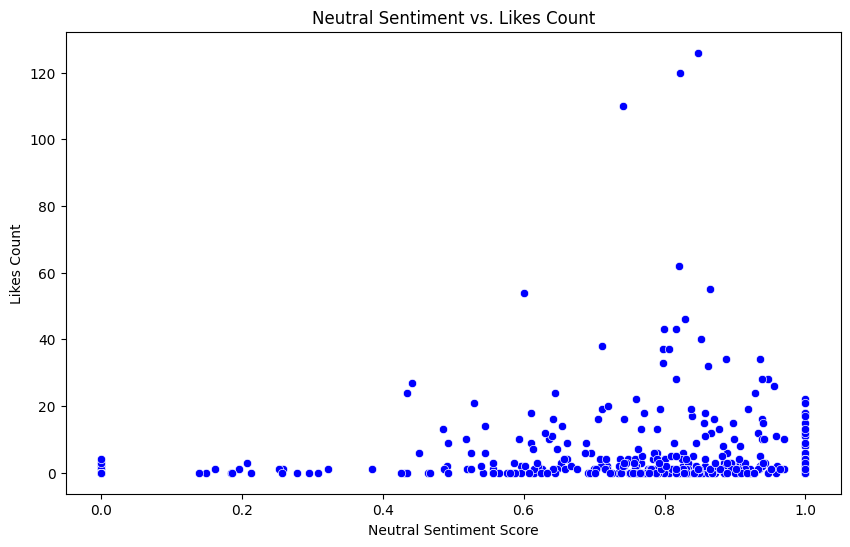

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaders, x='neu', y='likesCount',color='blue')
plt.title('Neutral Sentiment vs. Likes Count')
plt.xlabel('Neutral Sentiment Score')
plt.ylabel('Likes Count')
plt.show()

*Effect* of Neutal Sentiment on CommentsCount

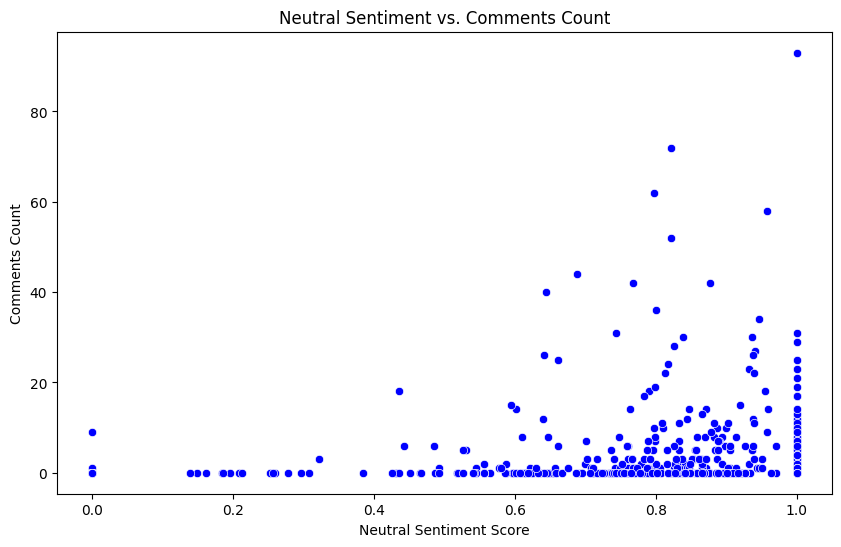

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaders, x='neu', y='commentsCount',color='blue')
plt.title('Neutral Sentiment vs. Comments Count')
plt.xlabel('Neutral Sentiment Score')
plt.ylabel('Comments Count')
plt.show()

Correlation Matrix Between Neutral Sentiment, LikesCount and CommentsCount

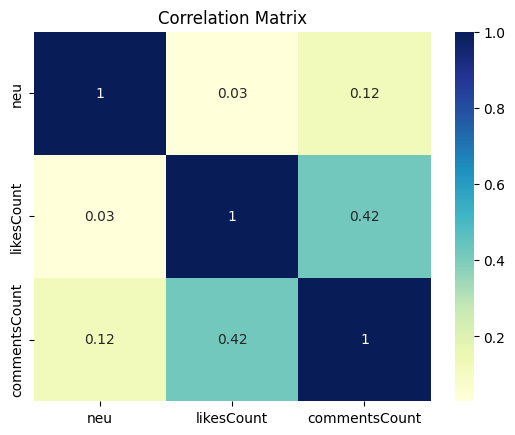

In [ ]:
selected_columns = ['neu', 'likesCount','commentsCount']
corr_matrix = vaders[selected_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

Thus from the above EDA , the Neutral Sentiment can be taken as the main metric to tell how much likesCount and commentsCount we can expect from people , as per the dataset,
----> If we have high Neutral Score(here it is above 0.4) there is a good probability that we end up getting good amount of likes and Comments.

# Trend Analysis

Analysis of Neutral Sentiment Score

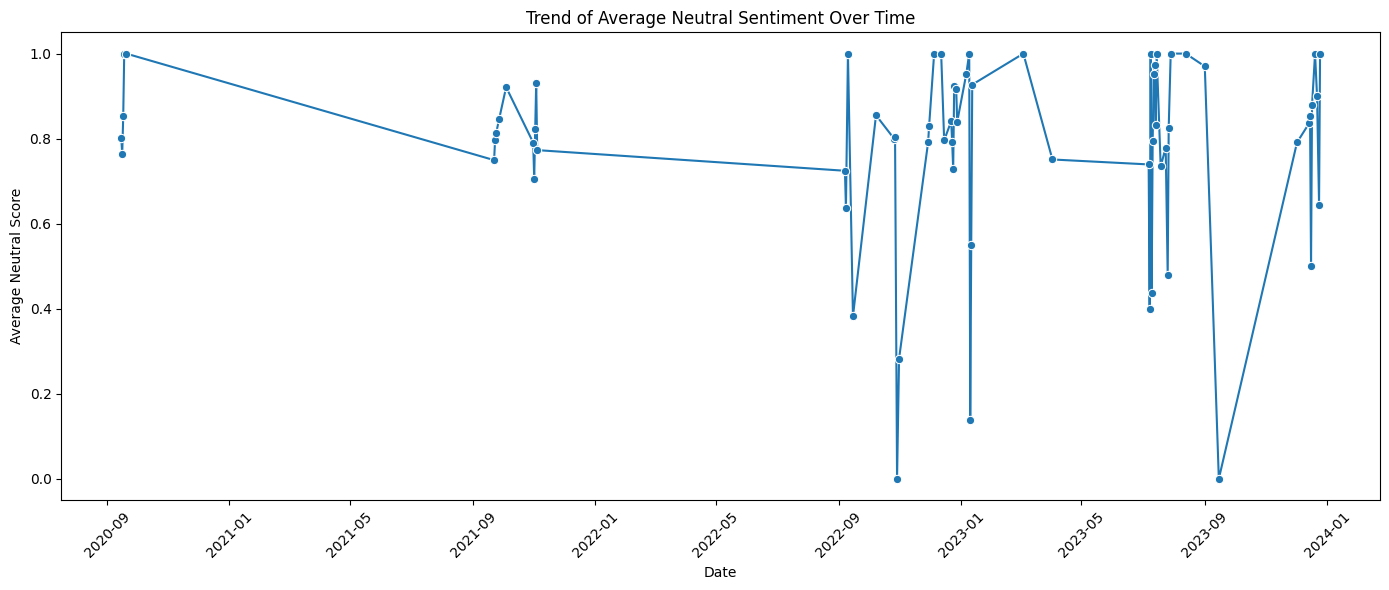

In [ ]:
vaders['date'] = pd.to_datetime(vaders['date'])

vaders['date_only'] = vaders['date'].dt.date

daily_neu = vaders.groupby('date_only')['neu'].mean().reset_index()
daily_neu.columns = ['Date', 'AvgNeutralScore']


plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_neu, x='Date', y='AvgNeutralScore', marker='o')
plt.title('Trend of Average Neutral Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Neutral Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

----> We can clearly see having a Neutral Sentiment Score of over 0.4 overtime

Analysis of likesCount

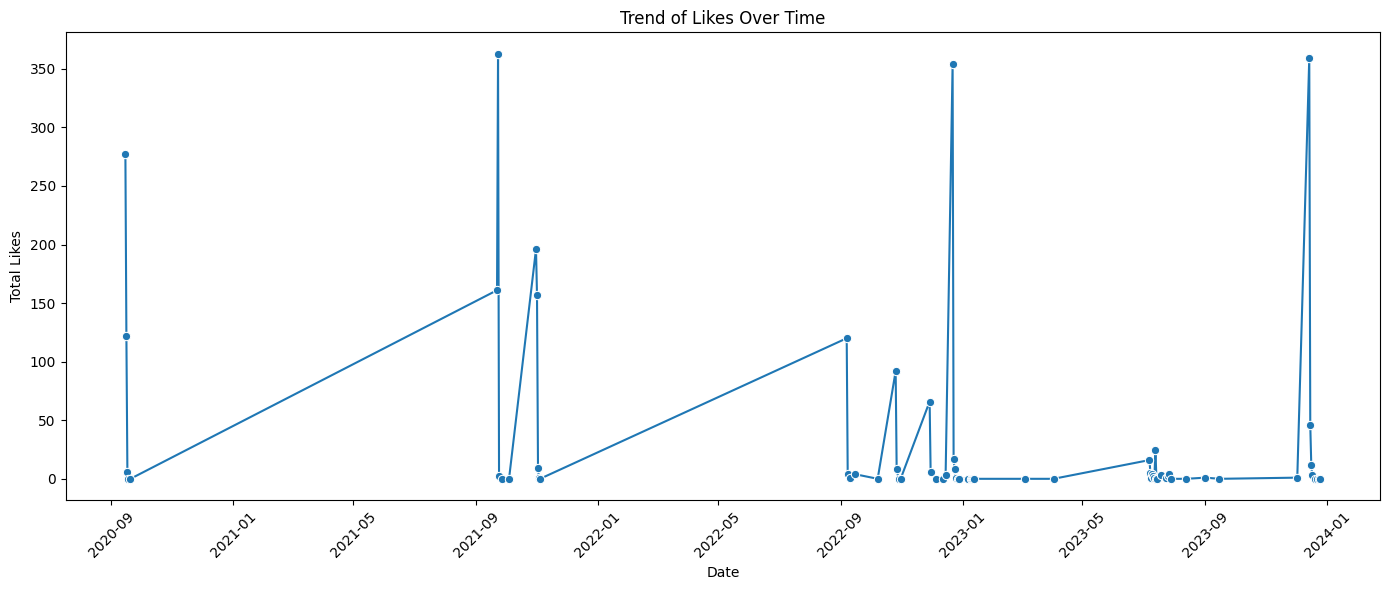

In [ ]:
vaders['date'] = pd.to_datetime(vaders['date'])

vaders['date_only'] = vaders['date'].dt.date

daily_likes = vaders.groupby('date_only')['likesCount'].sum().reset_index()

daily_likes.columns = ['Date', 'TotalLikes']

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_likes, x='Date', y='TotalLikes', marker='o')
plt.title('Trend of Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> Clearly we can observe that the shift in likesCount cannot be determined easily but it has peaked in various years

Analysis of CommentsCount

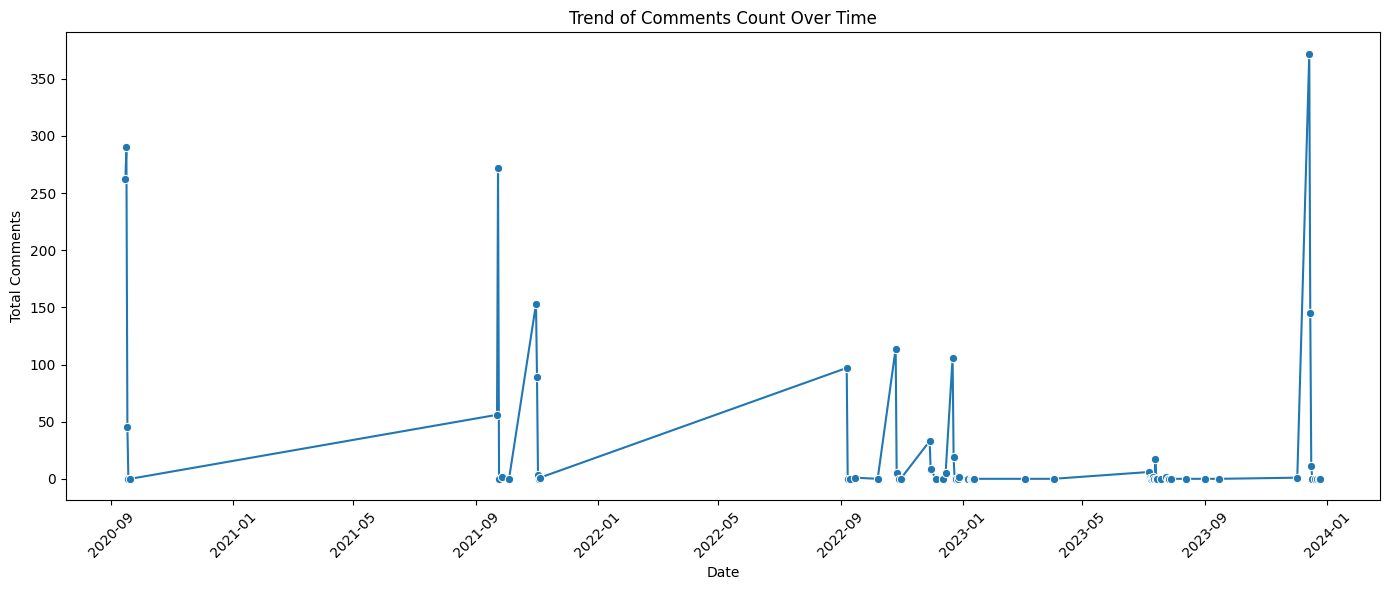

In [ ]:
vaders['date'] = pd.to_datetime(vaders['date'])


vaders['date_only'] = vaders['date'].dt.date


daily_comments = vaders.groupby('date_only')['commentsCount'].sum().reset_index()
daily_comments.columns = ['Date', 'TotalComments']


plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_comments, x='Date', y='TotalComments', marker='o')
plt.title('Trend of Comments Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

----> Similarly as likesCount , the shift in CommentsCount can also be not determined but has peaked in numerous years